# Fórum do SIGAA - PLN

###### Holanda, Jong, Lourenço, Oliveira

### Data Collect

Our aim was to obtain messages from "Fórum do SIGAA". Because SIGAA does not provide an API to collect that data, it was needed apply web scrapping techniques. It is important to notice that the messages are limited to the course BTI and do not represent all messages in the web plataform.

### Exploration

It is known (so far) that the forum consists of topics that are created by students and professors related to BTI. The topic is represented by title, author, how many messages (do not include the first message from author) and last message sent datetime. Besides, topic answers are represented by sent datetime, author with registration code (matrícula), content.

From date of collect, it was noticed that there was 3070 registered topics in the forum. They are presented by pages of 30 topics, so there are in total 103 pages. But that does not express the depth of messages registered. In total, there was 11920 messages in almost 11 years (2013 to 2024).

Let's have a look at our dataset:

In [72]:
%pip install --upgrade nbformat



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
%pip install plotly
%pip install spacy
%pip install nltk
%pip install matplotlib
%pip install ipython
%pip install ipywidgets
%pip install regex
%pip install seaborn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [75]:
pip show nbformat


Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS

In [76]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider()
display(slider)


IntSlider(value=0)

In [77]:
!python -m spacy download pt_core_news_sm

                                              0.0/13.0 MB ? eta -:--:--
                                              0.3/13.0 MB 5.2 MB/s eta 0:00:03
     --                                       0.8/13.0 MB 8.3 MB/s eta 0:00:02
     ----                                     1.5/13.0 MB 10.5 MB/s eta 0:00:02
     -------                                  2.3/13.0 MB 11.5 MB/s eta 0:00:01
     ----------                               3.3/13.0 MB 13.2 MB/s eta 0:00:01
     -------------                            4.3/13.0 MB 14.3 MB/s eta 0:00:01
     ----------------                         5.4/13.0 MB 15.6 MB/s eta 0:00:01
     --------------------                     6.6/13.0 MB 16.9 MB/s eta 0:00:01
     ------------------------                 7.9/13.0 MB 18.1 MB/s eta 0:00:01
     ---------------------------              9.1/13.0 MB 18.7 MB/s eta 0:00:01
     ---------------------------------       11.0/13.0 MB 22.5 MB/s eta 0:00:01
     -------------------------------------   12.4/


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd

df = pd.read_json('dataset/forum.json')

df.sample(10, random_state=314)



,titulo,data,hora,nome,conteudo
4274,Pesquisa para alunos que já pagaram VGA (ajude...,20/09/2021,16:33:27,RAFAELA HORACINA SILVA ROCHA SOARES,"Olá, pessoal.\n\nUma das alunas egressas do BT..."
8692,Provas de proficiencia de inglês e matematica,27/01/2016,15:56:25,JOSÉ HERICK MELO DA SILVA,"Não é obrigatório, contudo se for aprovado ser..."
9478,Treinamento para o UCC 2015,25/03/2015,18:09:34,MARIA CLARA SOUZA DE FONTES PEREIRA,"Professora, eu gostaria de participar do trein..."
10032,Novo Modelo Camisa BTI,03/09/2014,15:51:25,JOSE VICTOR GAMA BEZERRA,"Roberto, como posso entrar em contato com você..."
5524,Sugestões de minicursos para o DAAL promover,29/10/2019,20:10:39,ANDRECIO COSTA BEZERRA,Docker\n
5522,Sugestões de minicursos para o DAAL promover,29/10/2019,10:41:48,VICTOR HUGO FREIRE RAMALHO,docker\n
1171,Cadê o professor?,18/08/2023,21:08:15,RANNA BEATRIZ DE LIMA LISBOA,A turma do sábado também está sem professor. (...
9028,VOTAÇÃO - ambientes de estudos,11/08/2015,18:29:46,WILSON SILVA DE FARIAS,"Ótima iniciativa, Cephas! Parabéns!\n\nRespond..."
7329,"[URGENTE] Demanda de Grafos, Cálculo numérico,...",17/05/2017,15:06:54,CARLOS ANTÔNIO DE OLIVEIRA NETO,"Grafos é uma das últimas que faltam para mim, ..."
2724,Disciplinas Eletivas,28/08/2022,19:20:52,VICTOR EDUARDO NASCIMENTO,Mandei essa mesma pergunta no início da matríc...


An initial glance at the dataset shows us two areas of interest, the titles and the contents. The texts so far also seem surprisingly clean, but let's check further.

We can start by isolating the collumns of interest. 

We could leave titles attached to their respective content, but notice how titles repeat themselves in that format. Any analysis or model built on that would be heavily biased towards the words in the titles, which would not be necessarily representative of the forum as a whole.

In [79]:
df_titles = df['titulo']
df_content = df['conteudo']

print(df_titles.shape, df_content.shape)

(11922,) (11922,)


We can then easily get rid of repeated values in the titles with the pandas df.drop_duplicates method

In [80]:
df_titles.drop_duplicates(inplace = True)

df_titles.shape

(2711,)

Analysing content and titles separately may be worthwhile, but it may also be interesting to see what we can get using both at once.

In [81]:
df_text = pd.concat([df_titles, df_content], axis=0)

df_text.shape

(14633,)

Now that we have our datasets, let's check them again. First, messages contents:

In [82]:
for content in df_content.sample(10, random_state=200):
    print(content)

Tem alguma previsão para o início das aulas?

Me interesso em DIM0346 - GERENCIAMENTO E SEGURANCA EM REDES DE COMPUTADORES.
Turnos: vespertino ou noturno.

up

kkkkkkkkkkkkkkkkkkkkkkkkkk desculpe Anrafell

IMD0902 é "INGLES TECNICO I" ou "Introdução à Internet das Coisas"?

Boa noite galera de TI!

NOSSOS CANECOS FINALMENTE PRONTINHOS PARA DISTRIBUIÇÃO

E sabe qual a melhor parte?

Você que comprou o Projeto ReX (festa de integração) vai ter em primeira mão!!

A primeira distribuição dos canecos será durante o PROJETO REX

Para aqueles que não compraram o caneco, temos uma boa notícia, ESTAREMOS VENDENDO NO PROJETO REX!!

CANECO + TIRANTE APENAS R$ 40,00

OBS: Aqueles que não pegarem durante o integra, ainda divulgaremos próxima semana como será o esquema para todo mundo pegar o caneco

Confere o vídeo no insta no link abaixo para ver o resultado iradooooo dos nossos canecos

https://www.instagram.com/reel/Cq9GBVjrg4Y/?igshid=YmMyMTA2M2Y=

Tenho interesse em participar, quais os pré re

Second, titles:

In [83]:
for title in df_titles.sample(10, random_state=200):
    print(title, '\n')

[Sugestão] Salas de estudos divididas 

VTEX no IMD - UFRN | 29/08 

Novas turmas criadas HOJE 

Processos de aproveitamento de estudos 

GRUPO PARA OS FORMANDOS 

Solicitação de Componente Curricular 

PROJETO DE EXTENSÃO - Oficina de Expressão Oral em Língua Inglesa 

Oportunidade de Bolsa 

Ferramentas para a disciplina IMD1001 - MATEMÁTICA ELEMENTAR 

Novo Coordenador e Sala da Coordenação 



In [84]:
for txt in df_text.sample(10, random_state=300):
    print(txt, '\n')

Nova Disciplina 

Fui assaltado também na minha primeira semana no IMD, isso em 2020, enquanto aguardava na parada próximo às residencias universitarias. Muito perigoso.
 

Existe algum meio no SiGAA para conferir se o vínculo foi confirmado?
 

Jefferson,

pode ser que para alguns alunos aconteça algum problema. Peço que tente novamente em outro PC e veja se a unidade está montada.

Caso tenha algum problema, procure o pessoal da TI na sala B115.
 

Obrigado.
 

Obrigado Rubem.
 

Pessoal, eu fiz prova na sala A306 e esqueci minha garrafa d'água na sala. É uma garrafa de alumínio prateada... Se alguém encontrar por favor deixem na secretaria. Agradeço desde ja
 

Cade as disciplinas na sexta 6N1234 ??? Quem quer pagar no mínimo 5 matérias não consegue....
 

@jessielylvr
 

Cine Empreender com a SoftUrbano 



## Cleaning

As far as texts with no standard format (like the ones in an online forum) go, these are surprisingly clean so far. Most of what could be considered thrash for our purposes are links, emails and citations. Removing special characters later on would result in a lot of gibberish from these cases, but they are also not particularly easy to isolate. Selecting the most frequent words for our vocabulary might be enough to get rid of these extra data. But let's do some tests. 

In [85]:
import re

def remove_emails_com(text):
    return re.sub(r'[^\s]+.com', '', text).strip()

def remove_emails_br(text):
    return re.sub(r'[^\s]+.br', '', text).strip()

def remove_links(text):
    return re.sub(r'http[^\s]+', '', text).strip()

def remove_citations(text):
    return re.sub(r'@[^\s]+', '', text).strip()

def remove_numbers(text):
    return re.sub(r'\d+', '', text).strip()

def remove_special_characters(text):
    return re.sub(r'[^\w\s.!?]', '', text).strip()    

def remove_empty_lines(text):
    return "\n".join([line for line in text.split('\n') if line.strip() != ''])

test_str = "mande para o email sample_email@ufrn.edu.br ou sample_email@gmail.com, ou se   inscreva no site https://url.com.br/inscricao - @user"

result = remove_links(test_str)
result = remove_emails_br(result)
result = remove_emails_com(result)
result = remove_citations(result)
result = remove_numbers(result)
result = remove_special_characters(result)
result = remove_empty_lines(result)


print(result)

mande para o email  ou  ou se   inscreva no site


These seems to work well enough. Other than that, we could check for spelling errors. However, the texts seem clean enough and spelling erros can be eliminated by frequency, so for now let's skip that step. Let's just add a function to get rid of random formatting like lines and tabs. We can also get rid of repeated symbols and possible punctuation errors.

In [86]:
def remove_repeated_symbols(text):
    return re.sub(r'(\W)\1+', r'\1', text).strip()

def remove_excessive_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def fix_isolated_commas(text):
    # Replace punctuation with a blank character before
    text = re.sub(r' ([.,:;!?])', r'\1', text)
    return text.strip()

Now we just need to build our pipeline.

In [87]:
from sklearn.pipeline import Pipeline # Pipeline applies a list of transforms. You can also add an estimator at the end, so it will be completely encapsulated.
from sklearn.preprocessing import FunctionTransformer # FunctionTransformer allows to apply an arbitrary function to the data, so we can use it in the pipeline


pipeline_clean_text = Pipeline([
    ('remove_links', FunctionTransformer(remove_links)),
    ('remove_emails_br', FunctionTransformer(remove_emails_br)),
    ('remove_emails_com', FunctionTransformer(remove_emails_com)),
    ('remove_citations', FunctionTransformer(remove_citations)),
    ('remove_excessive_spaces', FunctionTransformer(remove_excessive_spaces)),
    ('remove_repeated_symbols', FunctionTransformer(remove_repeated_symbols)),
    ('fix_isolated_commas', FunctionTransformer(fix_isolated_commas)),
    ('remove_numbers', FunctionTransformer(remove_numbers)),
    ('remove_special_characters', FunctionTransformer(remove_special_characters)),
    ('remove_empty_lines', FunctionTransformer(remove_empty_lines)),
    
])

# We can apply the pipeline to the data
pipeline_clean_text.transform(test_str)

'mande para o email ou ou se inscreva no site'

Now that we have setted our pipeline, let's clean our datasets:

In [88]:
text_clean = df_text.apply(pipeline_clean_text.transform)
titles_clean = df_titles.apply(pipeline_clean_text.transform)
content_clean = df_content.apply(pipeline_clean_text.transform)

In [89]:
for txt in content_clean.sample(10, random_state=200):
    print(txt, '\n')

Tem alguma previsão para o início das aulas? 

Me interesso em DIM  GERENCIAMENTO E SEGURANCA EM REDES DE COMPUTADORES. Turnos vespertino ou noturno. 

up 

kkkkkkkkkkkkkkkkkkkkkkkkkk desculpe Anrafell 

IMD é INGLES TECNICO I ou Introdução à Internet das Coisas? 

Boa noite galera de TI! NOSSOS CANECOS FINALMENTE PRONTINHOS PARA DISTRIBUIÇÃO E sabe qual a melhor parte? Você prou o Projeto ReX festa de integração vai ter em primeira mão! A primeira distribuição dos canecos será durante o PROJETO REX Para aqueles que praram o caneco temos uma boa notícia ESTAREMOS VENDENDO NO PROJETO REX! CANECO  TIRANTE APENAS R  OBS Aqueles que não pegarem durante o integra ainda divulgaremos próxima o será o esquema para todo mundo pegar o caneco Confere o vídeo no insta no link abaixo para ver o resultado iradooooo dos nossos canecos 

Tenho interesse em participar quais os pré requisitos? 

Seria possível disponibilizar Desenvolvimento WEB ? 

Olá Any a página do curso no site do IMD é essa Lá no f

In [90]:
for txt in titles_clean.sample(10, random_state=200):
    print(txt, '\n')

Sugestão Salas de estudos divididas 

VTEX no IMD  UFRN 

Novas turmas criadas HOJE 

Processos de aproveitamento de estudos 

GRUPO PARA OS FORMANDOS 

Solicitação de Componente Curricular 

PROJETO DE EXTENSÃO  Oficina de Expressão Oral em Língua Inglesa 

Oportunidade de Bolsa 

Ferramentas para a disciplina IMD  MATEMÁTICA ELEMENTAR 

Novo Coordenador e Sala da Coordenação 



In [91]:
for txt in text_clean.sample(10, random_state=300):
    print(txt, '\n')

Nova Disciplina 

Fui assaltado também na minha primeira semana no IMD isso em  enquanto aguardava na parada próximo às residencias universitarias. Muito perigoso. 

Existe algum meio no SiGAA para conferir se o vínculo foi confirmado? 

Jefferson pode ser que para alguns alunos aconteça algum problema. Peço que tente novamente em outro PC e veja se a unidade está montada. Caso tenha algum problema procure o pessoal da TI na sala B. 

Obrigado. 

Obrigado Rubem. 

Pessoal eu fiz prova na sala A e esqueci minha garrafa dágua na sala. É uma garrafa de alumínio prateada. Se alguém encontrar por favor deixem na secretaria. Agradeço desde ja 

Cade as disciplinas na sexta N? Quem quer pagar no mínimo  matérias não consegue. 

 

Cine a SoftUrbano 



## Analysis

Let's do some a analysis of our clean datasets.

In [92]:
word_counts_content = content_clean.str.split().apply(len)
word_counts_titles = titles_clean.str.split().apply(len)
word_counts_text = text_clean.str.split().apply(len)

word_counts_content.describe()

count    11922.000000
mean        40.658027
std         68.105479
min          0.000000
25%          6.000000
50%         18.000000
75%         45.750000
max       1116.000000
Name: conteudo, dtype: float64

In [93]:
word_counts_titles.describe()

count    2711.000000
mean        6.478421
std         3.206226
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        19.000000
Name: titulo, dtype: float64

In [94]:
word_counts_text.describe()

count    14633.000000
mean        34.325702
std         62.906446
min          0.000000
25%          5.000000
50%         12.000000
75%         36.000000
max       1116.000000
dtype: float64

You may have noticed that we have some empty content. Let's get rid of it.

In [95]:
indexDrop = []

for i in range(len(content_clean)):
    if len(content_clean[i]) == 0:
        indexDrop.append(i)

content_clean.drop(indexDrop, axis=0, inplace=True)
text_clean.drop(indexDrop, axis=0, inplace=True)

word_counts_content = content_clean.str.split().apply(len)
word_counts_text = text_clean.str.split().apply(len)

word_counts_content.describe()

count    11799.000000
mean        41.081871
std         68.332274
min          1.000000
25%          6.000000
50%         18.000000
75%         46.000000
max       1116.000000
Name: conteudo, dtype: float64

In [96]:
word_counts_text.describe()

count    14504.000000
mean        34.628654
std         63.103042
min          1.000000
25%          5.000000
50%         12.000000
75%         36.000000
max       1116.000000
dtype: float64

Luckily there wasn't much to get rid of. Now let's continue:

In [97]:
import plotly.graph_objects as go


def word_count_distr_graph(word_counts, title):
    # Plot
    fig = go.Figure(data=[go.Histogram(x=word_counts)])
    # add a title to center above the chart
    fig.update_layout(title_text=title, title_x=0.5)
    fig.show()

word_count_distr_graph(word_counts_text, 'Word count distribution in forum')

In [98]:
word_count_distr_graph(word_counts_titles, 'Word count distribution in titles')

In [99]:
word_count_distr_graph(word_counts_content, 'Word count distribution in messages')

It seems there are some words that appear very frequently in this dataset. Let's get an idea of what they are with Counter.

In [100]:
from collections import Counter
import plotly.graph_objects as go

def plot_histogram_word(text_list, n_most_common=30, title="text"):
    # create a list of words
    words = []
    for txt in text_list:
        words += txt.split()

    # count the number of times each word appears in the text
    word_counts = Counter(words)

    # select the top 30 most frequent words
    word_counts = dict(word_counts.most_common(n_most_common))

    # create a bar chart
    fig = go.Figure([go.Bar(x=list(word_counts.keys()), y=list(word_counts.values()))])
    fig.update_layout(title_text=f'Top {n_most_common} most frequent words in the {title}', title_x=0.5)
    fig.show()

plot_histogram_word(text_clean, 30, 'forum')
plot_histogram_word(titles_clean, 30, 'titles')
plot_histogram_word(content_clean, 30, 'messages')

There sure are a lot stop words we need to get rid of.  We'll use both spacy's and nltk's list for this:

In [101]:
import spacy
nlp = spacy.load('pt_core_news_sm')
stopwords_spacy = nlp.Defaults.stop_words
list(stopwords_spacy)[:10]

['todas',
 'algo',
 'vossa',
 'estas',
 'sobre',
 'dizem',
 'aí',
 'porquê',
 'deverá',
 'porque']

In [102]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_nltk = stopwords.words('portuguese')

list(stopwords_nltk)[:10]

[nltk_data] Downloading package stopwords to C:\Users\Alan de
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [103]:
both_stopwords = set(stopwords_nltk) | set(stopwords_spacy)

In [104]:
def remove_stop_word(text):
    text = re.sub(r'[^\w\s]', '', text)

    tokens = text.split()

    tokens = filter(lambda token: token not in both_stopwords, tokens)

    return ' '.join(tokens)

We took advantage of this process to also remove non-alphanumeric characters from or token that are not going to be relevant. Let's see if we improved somewhat.

In [105]:
text_clean_no_stopwords = text_clean.apply(remove_stop_word)
titles_clean_no_stopwords = titles_clean.apply(remove_stop_word)
content_clean_no_stopwords = content_clean.apply(remove_stop_word)

In [106]:
plot_histogram_word(text_clean_no_stopwords, 30, 'forum')
plot_histogram_word(titles_clean_no_stopwords, 30, 'titles')
plot_histogram_word(content_clean_no_stopwords, 30, 'messages')

Some interesting things are showing up, but maybe it would have been more useful to have all text in lowercase before we remove stopwords (given the presence of such obvious stop words like 'A' and 'O').

In [107]:
text_clean_no_stopwords_lower = text_clean.str.lower().apply(remove_stop_word)
titles_clean_no_stopwords_lower = titles_clean.str.lower().apply(remove_stop_word)
content_clean_no_stopwords_lower = content_clean.str.lower().apply(remove_stop_word)


plot_histogram_word(text_clean_no_stopwords_lower, 30, 'forum')
plot_histogram_word(titles_clean_no_stopwords_lower, 30, 'titles')
plot_histogram_word(content_clean_no_stopwords_lower, 30, 'messsages')

That's better, but now we can see we're getting some extra information that might not be all that useful for now. Is the difference between 'disciplina' and 'disciplinas' particularly important for what we want right now? What about 'interesse' or 'interessado'?

It seems in this case lemmatizing might be a good idea. But let's save our current datasets first.

In [108]:
text_clean_no_stopwords_lower.to_csv('text_clean_no_stopwords_lower.csv')
titles_clean_no_stopwords_lower.to_csv('titles_clean_no_stopwords_lower.csv')
content_clean_no_stopwords_lower.to_csv('content_clean_no_stopwords_lower.csv')

We can now do some lemmatizing:

In [109]:
def spacy_lemmatizer(text):
    doc = nlp(text)

    txt = [token.lemma_ for token in doc]

    txt = [word for word in txt if len(word) > 2]

    return ' '.join(txt)


(This might take some minutes)

In [110]:
text_clean_lemmatized = text_clean_no_stopwords_lower.apply(spacy_lemmatizer)

In [111]:
titles_clean_lemmatized = titles_clean_no_stopwords_lower.apply(spacy_lemmatizer)

In [112]:
content_clean_lemmatized = content_clean_no_stopwords_lower.apply(spacy_lemmatizer)

With our lemmatizing done, let's check our histograms again

In [113]:
plot_histogram_word(text_clean_lemmatized, 30, 'forum')
plot_histogram_word(titles_clean_lemmatized, 30, 'titles')
plot_histogram_word(content_clean_lemmatized, 30, 'messages')

Let's also check the bigrams and see if we get anything of interest.

In [114]:
import nltk
nltk.download('punkt')
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import plotly.graph_objs as go

# Defining the function to generate n-grams
def generate_ngrams(text, n, lowercase=False):
    if lowercase:
        text = text.lower()

    n_grams = ngrams(nltk.word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]


def plot_n_grams(dataset, n_most_common=30, n=2, title='text'):
    n_grams_counter = Counter()

    # Loop through each text in the training set
    for text in dataset.values:
        # Call the function to generate bigrams
        n_grams_counter.update(generate_ngrams(text, n, lowercase=True))
    
    # select the top 30 most frequent words
    n_grams_counter = dict(n_grams_counter.most_common(n_most_common))

    # create a bar chart
    fig = go.Figure([go.Bar(x=list(n_grams_counter.keys()), y=list(n_grams_counter.values()))])
    fig.update_layout(title_text=f'Top {n_most_common} most frequent bigrams in the {title}')
    fig.show()

[nltk_data] Downloading package punkt to C:\Users\Alan de
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
plot_n_grams(text_clean_lemmatized, title='forum')
plot_n_grams(titles_clean_lemmatized, title='titles')
plot_n_grams(content_clean_lemmatized, title='messages')

It appears that while lemmatizing does get rid of some unecessary data, it also interferes with some relevant information (such as transforming 'dado', which means data, into 'dar', which means to give). 

Let's filter out words with less than 3 characters of our non-lemmatized datasets and compare the results

In [116]:
def remove_less_than_three(text):
    tokens = [token for token in text.split() if len(token)>2]

    return ' '.join(tokens)

In [117]:
text_clean_reduce = text_clean_no_stopwords_lower.apply(remove_less_than_three)
titles_clean_reduce = titles_clean_no_stopwords_lower.apply(remove_less_than_three)
content_clean_reduce = content_clean_no_stopwords_lower.apply(remove_less_than_three)

In [118]:
plot_histogram_word(text_clean_reduce, 30, 'forum')
plot_histogram_word(titles_clean_reduce, 30, 'titles')
plot_histogram_word(content_clean_reduce, 30, 'messages')

In [119]:
plot_n_grams(text_clean_reduce, title='forum')
plot_n_grams(titles_clean_reduce, title='titles')
plot_n_grams(content_clean_reduce, title='messages')

Well, that's certainly better. It seems a certain subject might be frequently mentioned in our forum. let's check our trigrams to confirm it:

In [120]:
plot_n_grams(text_clean_reduce, title='forum', n=3)
plot_n_grams(titles_clean_reduce, title='titles', n=3)
plot_n_grams(content_clean_reduce, title='messages', n=3)

Yes, it is indeed cited ver frequently (even if most topics don't seen to be titled after it). Another thing of note in this dataset is the name 'helena velcic maziviero' which is showing up as a frequent trigram. Sure enough, this person seems to have had at some point an habit of signing of their messages with their name, and they have posted a lot on this forum.

All in all, the forum seems to have mostly been used as expected. Discussions of subjects, hours, the course itself, and internship and work opportunities seem to be the most frequent topics in it. In special, the most frequent subject is "Fundamentos Matemáticos da Computação".

titulo
curso férias pet resolução problemas matemática computação    2.629246
cursos férias linux git                                       1.969401
possibilidade turmas bti sábados                              1.928537
maratona feminina programação                                 1.679264
contratação substituto turma banco dados                      2.190408
                                                                ...   
disciplinas equivalentes                                      1.369375
boas vindas semestre                                          1.722815
horário aulas turmas imd                                      1.962746
secretaria coordenação                                        1.414033
msdn academic alliance                                        1.732051
Length: 2711, dtype: float64


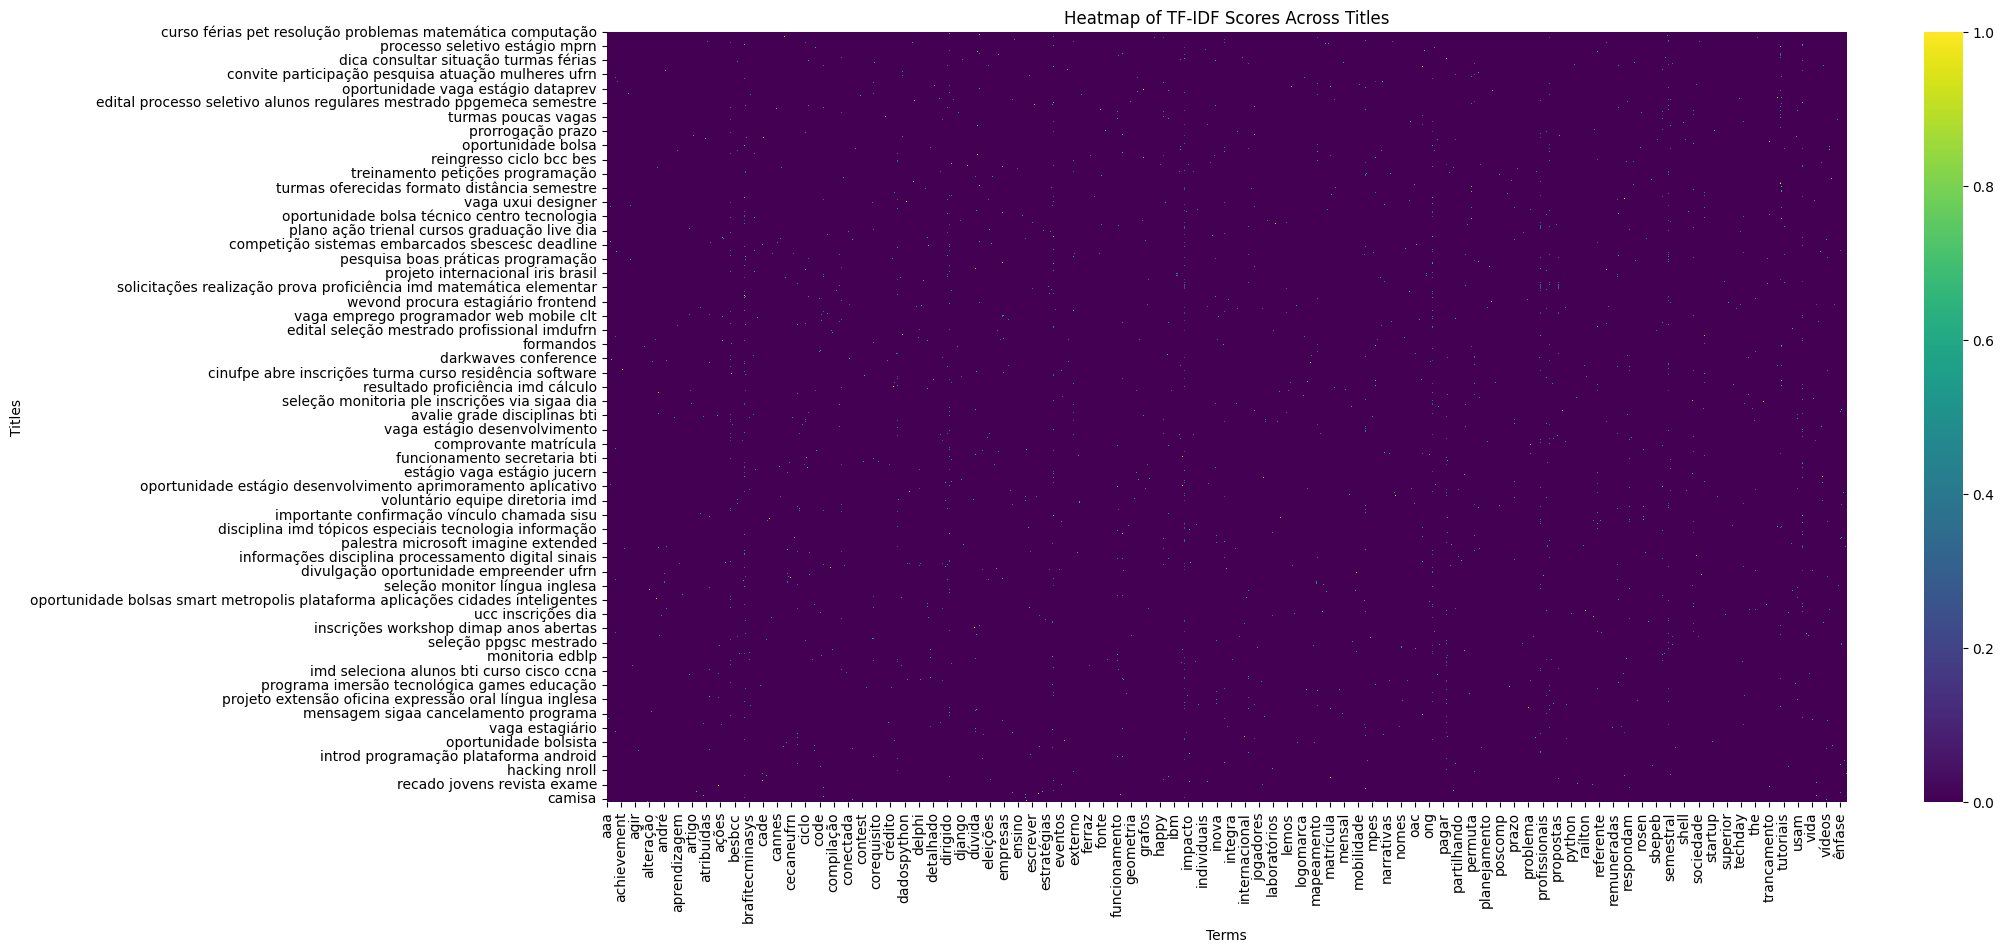

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_titles = TfidfVectorizer(min_df=1, max_df=1.0)
vectorizer_titles.fit(titles_clean_reduce)
titles_matrix = vectorizer_titles.transform(titles_clean_reduce).toarray()
titles_tfidf = pd.DataFrame(titles_matrix, columns=vectorizer_titles.get_feature_names_out(), index=titles_clean_reduce)

vectorizer_content = TfidfVectorizer()
vectorizer_content.fit(content_clean_reduce)
content_matrix = vectorizer_content.transform(content_clean_reduce).toarray()
content_tfidf = pd.DataFrame(content_matrix, columns=vectorizer_content.get_feature_names_out(), index=content_clean_reduce)

vectorizer_text = TfidfVectorizer()
vectorizer_text.fit(text_clean_reduce)
text_matrix = vectorizer_text.transform(text_clean_reduce).toarray()
text_tfidf = pd.DataFrame(text_matrix, columns=vectorizer_text.get_feature_names_out(), index=text_clean_reduce)

print(titles_tfidf.sum(axis=1))

sample_titles_tfidf = titles_tfidf.iloc[:10, :10]  # Adjust this to fit the data scale

plt.figure(figsize=(20, 10))
sns.heatmap(titles_tfidf, annot=False, cmap='viridis')  # Altere 'annot' para True se quiser ver os valores
plt.title('Heatmap of TF-IDF Scores Across Titles')
plt.xlabel('Terms')
plt.ylabel('Titles')
plt.xticks(rotation=90)  # Rotação dos termos no eixo x para melhor visualização
plt.show()


In [144]:
%pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     -----------------------                184.3/300.2 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


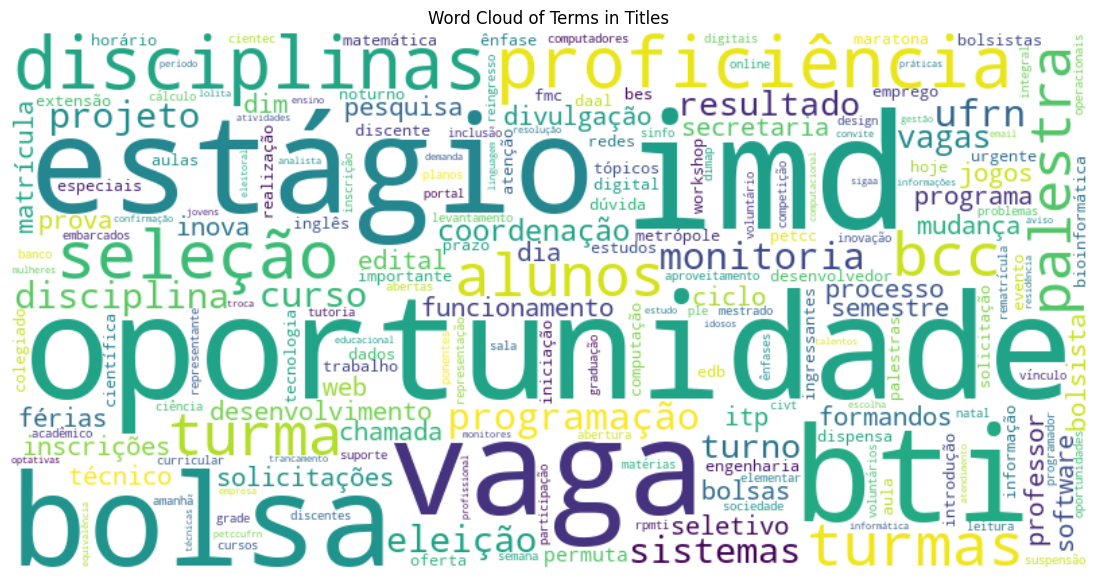

In [145]:
from wordcloud import WordCloud

total_scores = titles_tfidf.sum(axis=0)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_scores)

# Visualização da Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Terms in Titles')
plt.show()

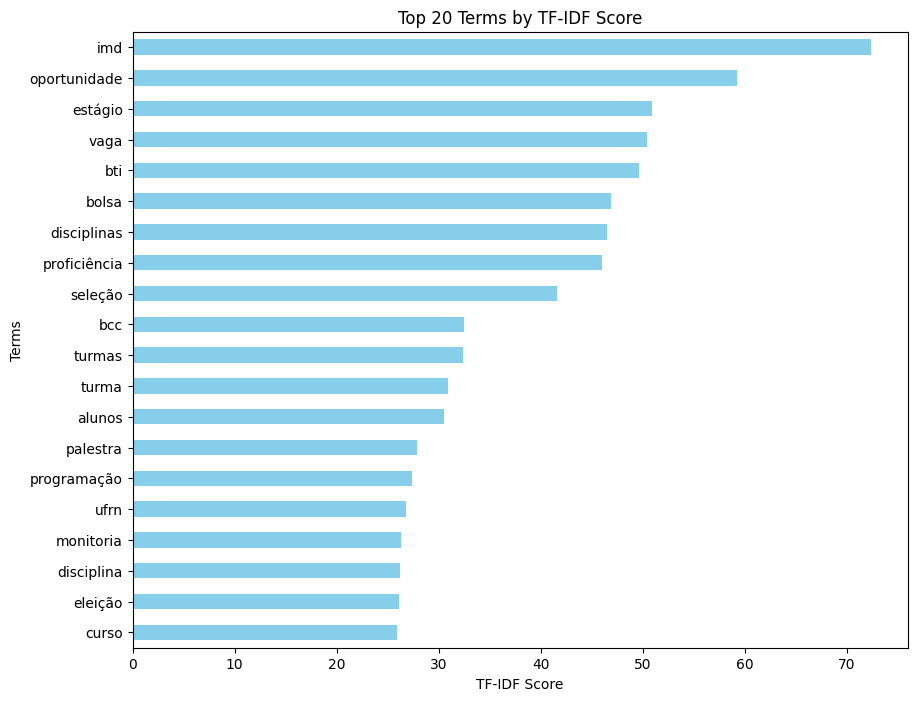

In [146]:
import matplotlib.pyplot as plt

total_scores = titles_tfidf.sum(axis=0).sort_values(ascending=True)[-20:]
plt.figure(figsize=(10, 8))
total_scores.plot(kind='barh', color='skyblue')
plt.title('Top 20 Terms by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.show()


<Figure size 1200x1500 with 0 Axes>

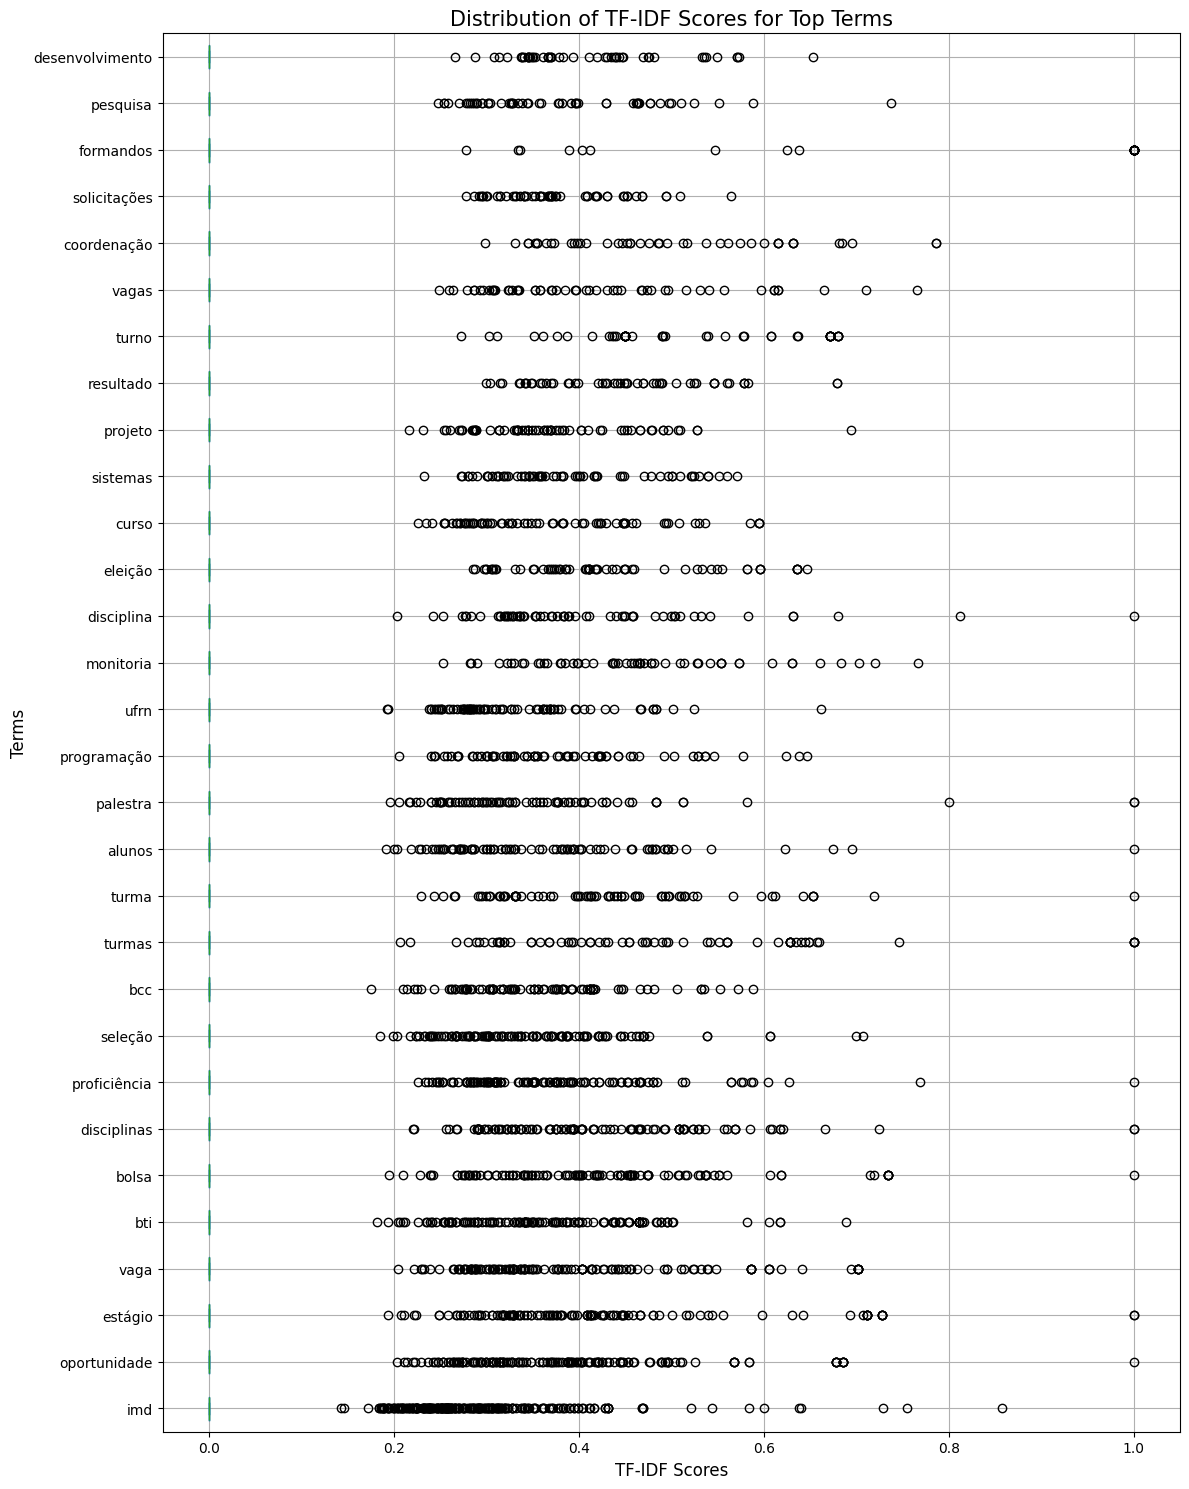

In [152]:
import matplotlib.pyplot as plt

# Suponha que 'titles_tfidf' é o DataFrame dos scores TF-IDF
# Focando apenas nos termos com os maiores valores médios de TF-IDF
top_terms = titles_tfidf.mean().sort_values(ascending=False).head(30).index
top_titles_tfidf = titles_tfidf[top_terms]

# Criando o gráfico
plt.figure(figsize=(12, 15))  # Ajuste o tamanho conforme necessário
boxplot = top_titles_tfidf.plot(kind='box', vert=False, figsize=(12, 15))
boxplot.set_title('Distribution of TF-IDF Scores for Top Terms', fontsize=15)
boxplot.set_xlabel('TF-IDF Scores', fontsize=12)
boxplot.set_ylabel('Terms', fontsize=12)
boxplot.grid(True)

# Ajustando rótulos para evitar sobreposição e melhorar a legibilidade
plt.yticks(fontsize=10)
plt.tight_layout()  # Ajuste automático para o layout
plt.show()



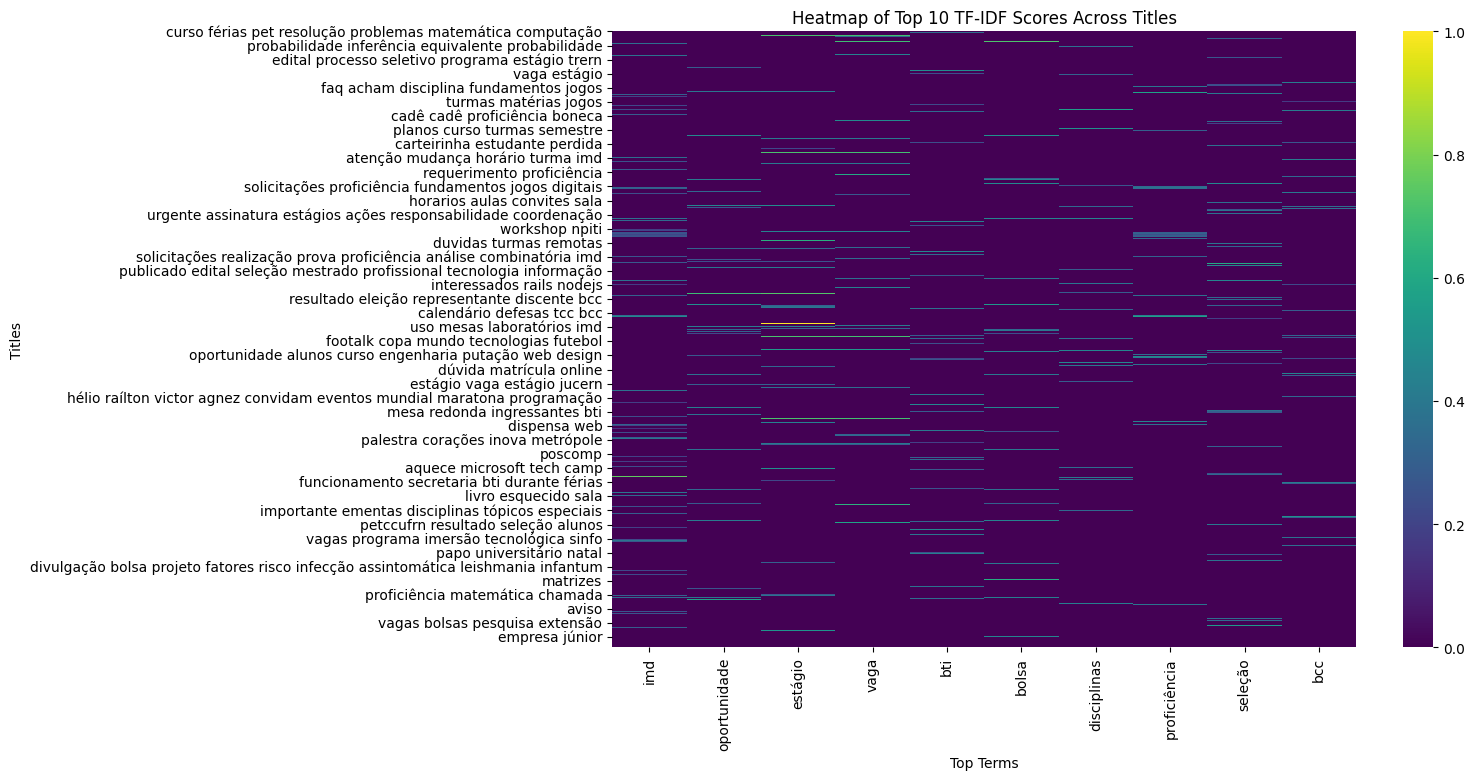

In [127]:
# Número de termos mais representativos que você quer mostrar
N = 10

# Calcular a média dos valores TF-IDF para cada termo
tfidf_means = titles_tfidf.mean(axis=0)

# Ordenar os termos por suas médias de TF-IDF e pegar os top N termos
top_terms = tfidf_means.sort_values(ascending=False).head(N).index

# Filtrar o DataFrame para incluir apenas os top N termos
filtered_tfidf = titles_tfidf[top_terms]

# Plotar o heatmap para os termos filtrados
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_tfidf, annot=False, cmap='viridis')
plt.title(f'Heatmap of Top {N} TF-IDF Scores Across Titles')
plt.xlabel('Top Terms')
plt.ylabel('Titles')
plt.xticks(rotation=90)
plt.show()